# **Space X  Falcon 9 First Stage Landing Prediction**

## Objectives

<b>Perform exploratory Data Analysis and determine Training Labels
- create a column for the class
- Standardize the data
- Split into training data and test data
  
-Find best Hyperparameter for SVM, Classification Trees, Logistic Regression and KNN
- Find the method performs best using test data</b>

In [11]:
pip install numpy pandas seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [13]:
def plot_confusion_matrix(y_true, y_pred):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ['Did not land', 'Landed'])
    plt.yticks([0.5, 1.5], ['Did not land', 'Landed'])
    plt.show()    

In [15]:
dataset1 = "dataset_part_2.csv"
data = pd.read_csv(dataset1)
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [16]:
dataset2 = 'dataset_part_3.csv'
X = pd.read_csv(dataset)
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [17]:
Y = data['Class'].to_numpy()   # Convert the class column in numpy array

In [18]:
# Standardize the data in X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

I'll split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
# Logistic Regression Parameter grid
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"], 
    "solver": ["lbfgs"]
}

lr = LogisticRegression(max_iter=1000)
# GridSearchCV
lr_cv = GridSearchCV(estimator=lr,param_grid=parameters,cv=10,scoring='accuracy')

# Fit model
lr_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [70]:
print("Best Parameters:", lr_cv.best_params_)
print(f"Best cross-validation accuracy:{lr_cv.best_score_:.2f}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy:0.80


In [78]:
lr_test_accuracy = lr_cv.score(X_test, Y_test)
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy:.2f}")

Logistic Regression Test Accuracy: 0.94


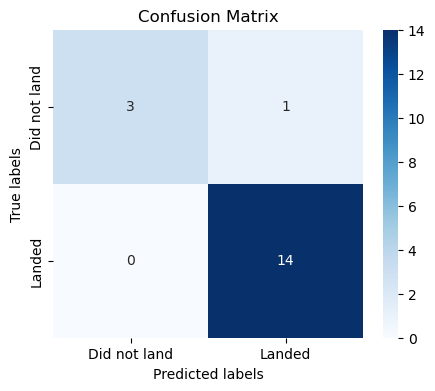

In [79]:
yhat=lr_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<b>Examining the confusion matrix, See that logistic regression can distinguish between the different classes and the problem is false positives.</b>

Overview:

True Postive - 14 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

In [38]:
# SVM Parameter grid
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# SVM model
svm = SVC()

# GridSearchCV with cv = 10
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
    scoring='accuracy'
)

# Fit model
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [40]:
print("Best parameters:", svm_cv.best_params_)
print(f"Best cross-validation accuracy:{svm_cv.best_score_:.2f}")

Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best cross-validation accuracy:0.83


In [80]:
svm_test_accuracy = svm_cv.score(X_test,Y_test)
print(f"SVM Test Accuracy: {svm_test_accuracy:.2f}")

SVM Test Accuracy: 0.89


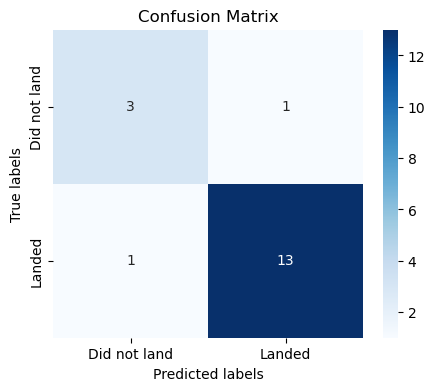

In [47]:
Y_pred = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, Y_pred)

In [56]:
#Decision Tree Parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV with cv = 10
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring='accuracy'
)

# Fit model
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [64]:
print("Best parameters:", tree_cv.best_params_)
print(f"Best cross-validation accuracy:{tree_cv.best_score_:.2f}")

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Best cross-validation accuracy:0.82


In [81]:
tree_test_accuracy = tree_cv.score(X_test,Y_test)
print(f" Tree CV Test Accuracy: {tree_test_accuracy:.2f}")

 Tree CV Test Accuracy: 0.89


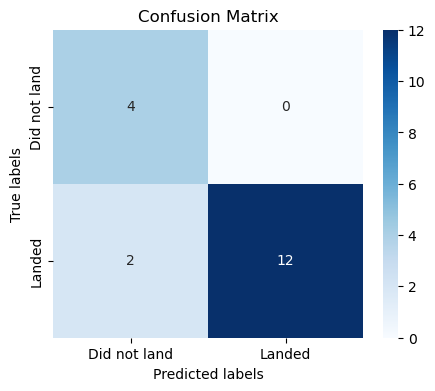

In [83]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [86]:
# KNN Parameter grid
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# KNN model
knn = KNeighborsClassifier()

# GridSearchCV with cv = 10
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=parameters,
    cv=10,
    scoring='accuracy'
)

# Fit model
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [89]:
print("Best parameters:", knn_cv.best_params_)
print(f"Best cross-validation for KNN accuracy:{knn_cv.best_score_:.2f}")

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation for KNN accuracy:0.78


In [92]:
test_accuracy = knn_cv.score(X_test, Y_test)
print(f"Test Accuracy:{test_accuracy:.2f}")

Test Accuracy:0.94


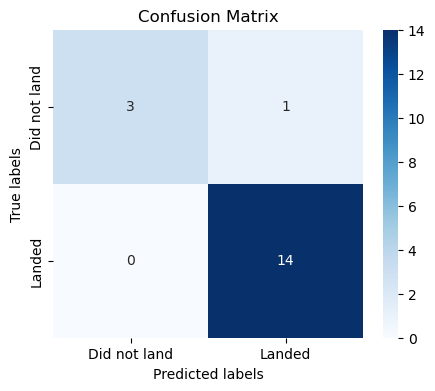

In [93]:
Y_pred = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, Y_pred)

In [99]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

accuracies = [
    lr_cv.score(X_test, Y_test),
    svm_cv.score(X_test, Y_test),
    tree_cv.score(X_test, Y_test),
    knn_cv.score(X_test, Y_test)
]

accuracy_df = pd.DataFrame({
    'Model': models,
    'Test Accuracy': accuracies
})

accuracy_df

,Model,Test Accuracy
0,Logistic Regression,0.944444
1,SVM,0.888889
2,Decision Tree,0.888889
3,KNN,0.944444


<b>This table clearly shows Logistic Regression and KNN model performs best on unseen data.</b>

In [95]:
y_pred_lr   = logreg_cv.predict(X_test)
y_pred_svm  = svm_cv.predict(X_test)
y_pred_tree = tree_cv.predict(X_test)
y_pred_knn  = knn_cv.predict(X_test)

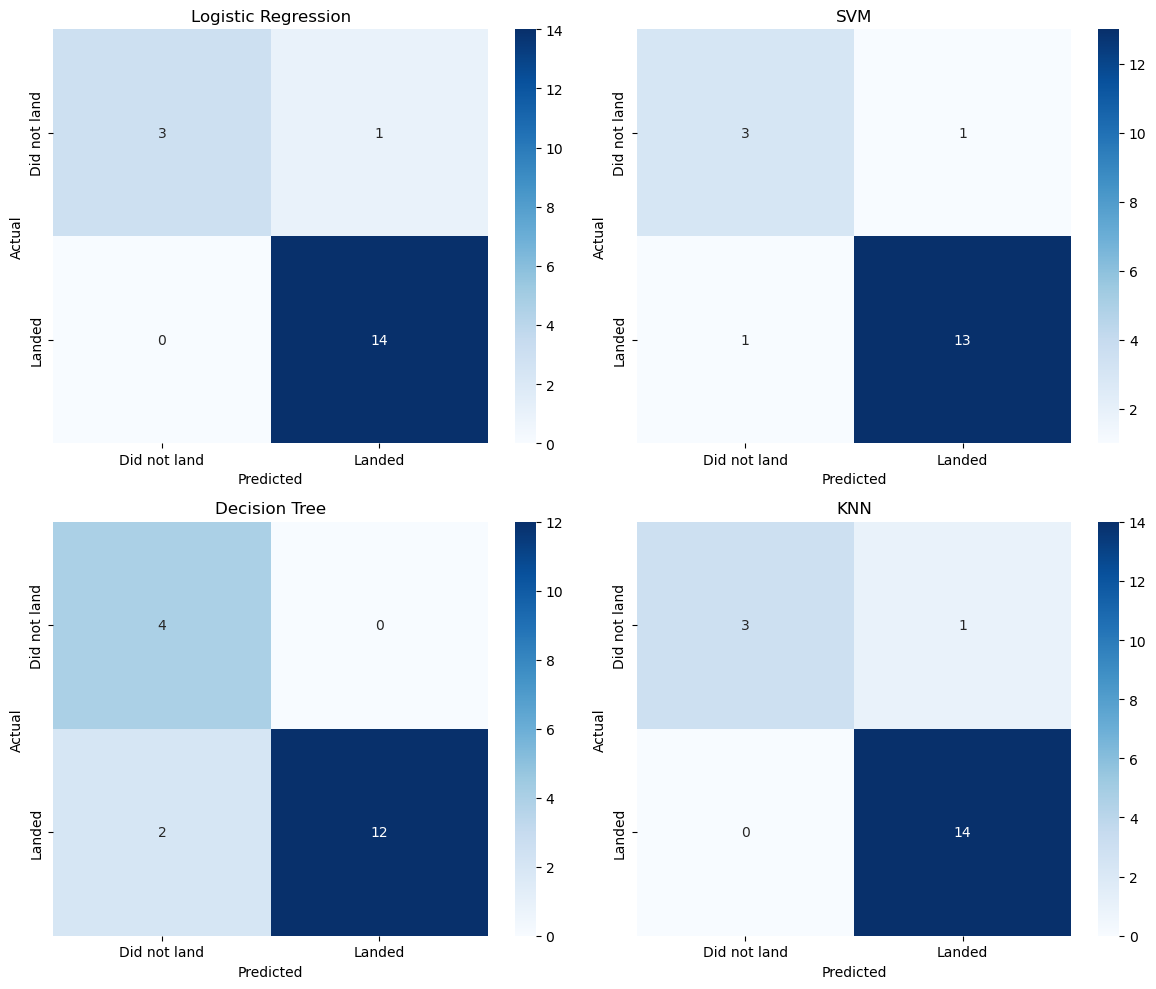

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_preds = [
    (y_pred_lr, 'Logistic Regression'),
    (y_pred_svm, 'SVM'),
    (y_pred_tree, 'Decision Tree'),
    (y_pred_knn, 'KNN')
]

for ax, (pred, title) in zip(axes.flatten(), models_preds):
    cm = confusion_matrix(Y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(['Did not land', 'Landed'])
    ax.set_yticklabels(['Did not land', 'Landed'])

plt.tight_layout()
plt.show()

### Final Conclusion
Multiple machine learning models were developed to predict whether the SpaceX Falcon 9 first stage would land successfully. Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbors (KNN) models were trained using standardized numerical and encoded categorical features.

After hyperparameter tuning using GridSearchCV with 10-fold cross-validation, the models were evaluated on test data. Among all models, Logistic Regression achieved the highest test accuracy, indicating better generalization to unseen data.

The confusion matrix analysis further revealed that Logistic Regression produced fewer misclassifications, especially reducing false negatives, which is critical when predicting landing failures. This suggests that the model captures the underlying launch dynamics more effectively.

Overall, the results show that machine learning models can successfully predict launch outcomes using historical SpaceX data, and such predictive models can help reduce operational costs and improve mission planning.

<b>Logistic Regression the highest-accuracy model</b>